In [2]:
#Loading the dataset from Local Storage
from google.colab import files
uploaded =files.upload()

Saving model_data.csv to model_data.csv


# Data Preprocessing

In [22]:
#Importing the loaded Data from the Cloud Space
import pandas as pd

model_data=pd.read_csv("model_data.csv")
model_data.head()
data1 = model_data.drop(["Has_Insurance","Age","Monthly_Income"],axis=1)

In [23]:
#Describing the Data
model_data.describe()

,County,Sex,Education,Marital_Status,Chronic_Disease,Cluster,Emergency_Fund,Religion,Phone_Ownership,Financial_Priority,Age,Monthly_Income,Has_Insurance
count,20263.000000,20263.000000,20263.000000,20263.000000,20263.000000,20263.000000,20263.000000,20263.000000,20263.000000,20263.000000,20263.00000,20263.000000,20263.000000
mean,25.112422,1.584020,3.445788,3.214973,1.984800,1.348961,1.687855,1.245225,1.466663,3.125845,40.72092,7774.545674,0.225238
std,13.542028,0.492902,2.553042,3.562377,4.014897,0.476653,0.521509,2.417716,2.456383,3.061563,16.66278,12478.334509,0.417749
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.00000,98.000000,0.000000
25%,14.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28.00000,2000.000000,0.000000
50%,25.000000,2.000000,3.000000,4.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,36.00000,4500.000000,0.000000
75%,37.000000,2.000000,5.000000,4.000000,2.000000,2.000000,2.000000,1.000000,1.000000,3.000000,50.00000,10000.000000,0.000000
max,47.000000,2.000000,99.000000,99.000000,99.000000,2.000000,5.000000,99.000000,99.000000,99.000000,116.00000,400000.000000,1.000000


In [24]:
#One Hot Encoding
model_data.dtypes

data=pd.get_dummies(model_data,columns = ["County","Sex","Education",
                                          "Marital_Status","Chronic_Disease",
                                          "Cluster","Emergency_Fund","Religion",
                                          "Phone_Ownership","Financial_Priority"
                                          ])
data.head()

,Age,Monthly_Income,Has_Insurance,County_1,County_2,County_3,County_4,County_5,County_6,County_7,...,Phone_Ownership_99,Financial_Priority_1,Financial_Priority_2,Financial_Priority_3,Financial_Priority_4,Financial_Priority_5,Financial_Priority_6,Financial_Priority_11,Financial_Priority_12,Financial_Priority_99
0,59,13000,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,43,6000,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,72,1000,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,22,2500,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,36,98,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [25]:
model_data = data
model_data.head()

,Age,Monthly_Income,Has_Insurance,County_1,County_2,County_3,County_4,County_5,County_6,County_7,...,Phone_Ownership_99,Financial_Priority_1,Financial_Priority_2,Financial_Priority_3,Financial_Priority_4,Financial_Priority_5,Financial_Priority_6,Financial_Priority_11,Financial_Priority_12,Financial_Priority_99
0,59,13000,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,43,6000,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,72,1000,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,22,2500,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,36,98,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [26]:
#Declaring the Cramers_V Execution Function
from scipy.stats import chi2_contingency
import numpy as np




def cramers_V(var1,var2) :
  # Cross table building
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) 
   #Keeping of the test statistic of the Chi2 test
  stat = chi2_contingency(crosstab)[0] 
  obs = np.sum(crosstab) # Number of observations
  #Take the minimum value between the columns and the rows of the cross table
  mini = min(crosstab.shape)-1 
  return (stat/(obs*mini))

In [27]:
#Carrying Out the Cramers_V Test
rows= []

for var1 in data1:
  col = []
  for var2 in data1 :
    cramers =cramers_V(data1[var1], data1[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramers V  
  rows.append(col)
  
cramers_results = np.array(rows)
df =pd.DataFrame(cramers_results, columns = data1.columns, index =data1.columns)

<ipython-input-28-fd3f5bbb1a14>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


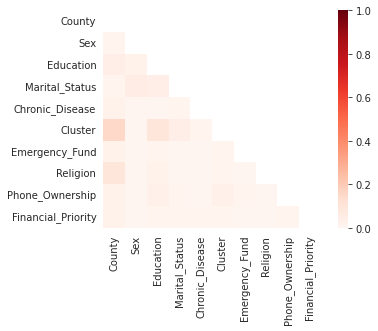

In [28]:
#Creating the HeatMap for Cramers_V Results
import seaborn as sns
import matplotlib.pyplot as plt



mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True,cmap='Reds')

plt.show()

### Model Fitting

In [29]:
#Importing the Keras Deep Learning Package for Model Fitting
import  numpy as np
from keras.layers import Dense
from keras.models import Sequential

In [30]:
#Scaling the Numeric Variables
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()


model_data[['Age', 'Monthly_Income']] = scaler.fit_transform(
    model_data[['Age', 'Monthly_Income']])
model_data.head(10)

,Age,Monthly_Income,Has_Insurance,County_1,County_2,County_3,County_4,County_5,County_6,County_7,...,Phone_Ownership_99,Financial_Priority_1,Financial_Priority_2,Financial_Priority_3,Financial_Priority_4,Financial_Priority_5,Financial_Priority_6,Financial_Priority_11,Financial_Priority_12,Financial_Priority_99
0,0.412371,0.032263,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.247423,0.014759,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.546392,0.002256,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.030928,0.006006,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.175258,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0.051546,0.014759,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0.319588,0.009757,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,0.123711,0.017259,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,0.195876,0.007257,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0.123711,0.007257,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [31]:
#Creating the training and test set
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
train,test = train_test_split(model_data, test_size=0.30)
train.head()

,Age,Monthly_Income,Has_Insurance,County_1,County_2,County_3,County_4,County_5,County_6,County_7,...,Phone_Ownership_99,Financial_Priority_1,Financial_Priority_2,Financial_Priority_3,Financial_Priority_4,Financial_Priority_5,Financial_Priority_6,Financial_Priority_11,Financial_Priority_12,Financial_Priority_99
18285,0.072165,0.009757,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3337,0.123711,0.012258,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
14655,0.144330,0.032263,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12126,0.453608,0.012258,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1148,0.154639,0.011008,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [32]:
#Exploring the Training set
train.describe()

,Age,Monthly_Income,Has_Insurance,County_1,County_2,County_3,County_4,County_5,County_6,County_7,...,Phone_Ownership_99,Financial_Priority_1,Financial_Priority_2,Financial_Priority_3,Financial_Priority_4,Financial_Priority_5,Financial_Priority_6,Financial_Priority_11,Financial_Priority_12,Financial_Priority_99
count,14184.000000,14184.000000,14184.000000,14184.000000,14184.000000,14184.000000,14184.000000,14184.000000,14184.000000,14184.000000,...,14184.000000,14184.000000,14184.000000,14184.000000,14184.000000,14184.000000,14184.000000,14184.000000,14184.000000,14184.000000
mean,0.223952,0.018739,0.224619,0.016991,0.020869,0.015581,0.018119,0.017696,0.019459,0.018119,...,0.000494,0.333192,0.280104,0.155245,0.001269,0.042090,0.106881,0.076142,0.004865,0.000212
std,0.171850,0.028514,0.417346,0.129242,0.142949,0.123852,0.133387,0.131849,0.138135,0.133387,...,0.022210,0.471371,0.449066,0.362151,0.035602,0.200801,0.308973,0.265235,0.069580,0.014542
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.092784,0.004756,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.175258,0.011008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.319588,0.024761,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.499877,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
#Exploring the Test set
test.describe()

,Age,Monthly_Income,Has_Insurance,County_1,County_2,County_3,County_4,County_5,County_6,County_7,...,Phone_Ownership_99,Financial_Priority_1,Financial_Priority_2,Financial_Priority_3,Financial_Priority_4,Financial_Priority_5,Financial_Priority_6,Financial_Priority_11,Financial_Priority_12,Financial_Priority_99
count,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,...,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.00000,6079.000000,6079.000000,6079.0
mean,0.223869,0.020262,0.226682,0.016944,0.018753,0.019082,0.016450,0.016450,0.018918,0.017931,...,0.000658,0.333114,0.288205,0.145748,0.002139,0.043757,0.10528,0.077315,0.004442,0.0
std,0.171636,0.036700,0.418720,0.129071,0.135663,0.136825,0.127209,0.127209,0.136245,0.132710,...,0.025645,0.471366,0.452964,0.352882,0.046198,0.204571,0.30694,0.267113,0.066502,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
25%,0.092784,0.004756,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
50%,0.175258,0.012258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
75%,0.329897,0.024761,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
max,0.969072,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.0


In [34]:
#Selecting the explanatory features from the Unbalanced Training Data
predictors = train.drop(columns=["Has_Insurance"],axis=1)
predictors1 = predictors.to_numpy()
n_col = predictors1.shape[1]

In [35]:
from keras.utils.np_utils import to_categorical
target = to_categorical(train.Has_Insurance)

In [36]:
#Training the Model using the Unbalanced Training set
from keras.layers import Dropout
model = Sequential()
model.add(Dense(500,activation= "relu",input_shape = (n_col,)))
model.add(Dropout(0.2))

model.add(Dense(600,activation= "relu"))
model.add(Dropout(0.2))


model.add(Dense(2,activation = "sigmoid"))
model.compile(optimizer = 'adam',loss = "binary_crossentropy",
              metrics= ["accuracy",'mse'])

model.fit(predictors1,target,epochs=50,batch_size=10,validation_split=0.1)
model.save("Ann.hs")

Epoch 1/50
1277/1277 [==============================] - 12s 8ms/step - loss: 0.4440 - accuracy: 0.8025 - mse: 0.1429 - val_loss: 0.3698 - val_accuracy: 0.8386 - val_mse: 0.1159
Epoch 2/50
1277/1277 [==============================] - 9s 7ms/step - loss: 0.4195 - accuracy: 0.8123 - mse: 0.1342 - val_loss: 0.3849 - val_accuracy: 0.8414 - val_mse: 0.1198
Epoch 3/50
1277/1277 [==============================] - 11s 8ms/step - loss: 0.4077 - accuracy: 0.8182 - mse: 0.1301 - val_loss: 0.3791 - val_accuracy: 0.8365 - val_mse: 0.1186
Epoch 4/50
1277/1277 [==============================] - 10s 8ms/step - loss: 0.3979 - accuracy: 0.8221 - mse: 0.1271 - val_loss: 0.3689 - val_accuracy: 0.8464 - val_mse: 0.1151
Epoch 5/50
1277/1277 [==============================] - 9s 7ms/step - loss: 0.3857 - accuracy: 0.8278 - mse: 0.1231 - val_loss: 0.3695 - val_accuracy: 0.8443 - val_mse: 0.1161
Epoch 6/50
1277/1277 [==============================] - 8s 6ms/step - loss: 0.3716 - accuracy: 0.8330 - mse: 0.1185 -

In [37]:
#Fitting the Model to the Test Set
predictors_test = test.drop(columns=["Has_Insurance"],axis=1)
predictors1_test = predictors_test.to_numpy()

In [38]:
train_y = train["Has_Insurance"]
test_y = test["Has_Insurance"]
train_y = target
test_y = to_categorical(test_y)

In [39]:
y_test = test["Has_Insurance"]

In [40]:
#Model Evaluation -Accuracy of Training and Test Set
pred_train= model.predict(predictors1)
scores = model.evaluate(predictors1, train_y, verbose=0)
print('Accuracy on training data: {} \n Error on training data: {}'.format(
    scores[1], 1 - scores[1]))   
 
pred_test= model.predict(predictors1_test)
scores2 = model.evaluate(predictors1_test, test_y, verbose=0)
print('Accuracy on test data: {} \n Error on test data: {}'.format(
    scores2[1], 1 - scores2[1]))  

444/444 [==============================] - 1s 3ms/step
Accuracy on training data: 0.9469825029373169 
 Error on training data: 0.053017497062683105
190/190 [==============================] - 0s 2ms/step
Accuracy on test data: 0.782036542892456 
 Error on test data: 0.21796345710754395


In [41]:
predictors_test = test.drop(columns=["Has_Insurance"],axis=1)
predictors1_test = predictors_test.to_numpy()

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
target_names = ['No', 'Has']

# get predict prob and label 
ypred = model.predict(predictors1_test, verbose=1)
ypred = np.argmax(ypred, axis=1)

print(classification_report(np.argmax(test_y, axis=1), ypred,
                            target_names=target_names))

190/190 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

          No       0.84      0.88      0.86      4701
         Has       0.52      0.43      0.47      1378

    accuracy                           0.78      6079
   macro avg       0.68      0.66      0.67      6079
weighted avg       0.77      0.78      0.77      6079



[[4159  542]
 [ 783  595]]


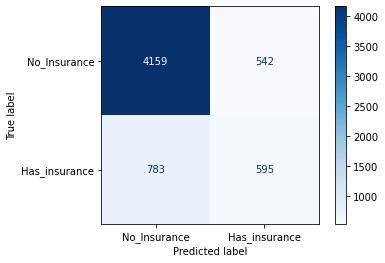

In [43]:
#Creating the Confusion Matrix of the Test Set
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ypred)
print(cm)
labels=["No_Insurance","Has_insurance"]
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [44]:
#Undersampled Data
#Applying random undersampling to training data to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

# summarizimg the class distribution
print(Counter(train['Has_Insurance']))

Counter({0: 10998, 1: 3186})


In [45]:
predictors = train.drop(columns=["Has_Insurance"],axis=1)
predictors1 = predictors.to_numpy()
n_col = predictors1.shape[1]

In [46]:
from keras.utils.np_utils import to_categorical
target = to_categorical(train.Has_Insurance)

In [47]:
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fitting and applying the transform
X_over, y_over = undersample.fit_resample(predictors, train['Has_Insurance'])
# summarize class distribution
print(Counter(y_over))

Counter({0: 3186, 1: 3186})


In [48]:
target = to_categorical(y_over)

In [49]:

predictors1 = X_over.to_numpy()
n_col = predictors1.shape[1]


In [50]:
test.describe()

,Age,Monthly_Income,Has_Insurance,County_1,County_2,County_3,County_4,County_5,County_6,County_7,...,Phone_Ownership_99,Financial_Priority_1,Financial_Priority_2,Financial_Priority_3,Financial_Priority_4,Financial_Priority_5,Financial_Priority_6,Financial_Priority_11,Financial_Priority_12,Financial_Priority_99
count,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,...,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.00000,6079.000000,6079.000000,6079.0
mean,0.223869,0.020262,0.226682,0.016944,0.018753,0.019082,0.016450,0.016450,0.018918,0.017931,...,0.000658,0.333114,0.288205,0.145748,0.002139,0.043757,0.10528,0.077315,0.004442,0.0
std,0.171636,0.036700,0.418720,0.129071,0.135663,0.136825,0.127209,0.127209,0.136245,0.132710,...,0.025645,0.471366,0.452964,0.352882,0.046198,0.204571,0.30694,0.267113,0.066502,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
25%,0.092784,0.004756,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
50%,0.175258,0.012258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
75%,0.329897,0.024761,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
max,0.969072,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.0


In [51]:
#Fitting the Model to the Undersampled Training Data
from keras.layers import Dropout
model1 = Sequential()
model1.add(Dense(30,activation= "relu",input_shape = (n_col,)))
model1.add(Dropout(0.2))

model1.add(Dense(6,activation= "relu"))
model1.add(Dropout(0.2))


model1.add(Dense(2,activation = "sigmoid"))
model1.compile(optimizer = 'adam',loss = "binary_crossentropy",
               metrics= ["accuracy",'mse'])

model1.fit(predictors1,target,epochs=50,batch_size=10,validation_split=0.2)
model1.save("Ann.hs")


Epoch 1/50
510/510 [==============================] - 4s 6ms/step - loss: 0.6458 - accuracy: 0.6145 - mse: 0.2278 - val_loss: 0.8961 - val_accuracy: 0.0000e+00 - val_mse: 0.3469
Epoch 2/50
510/510 [==============================] - 3s 6ms/step - loss: 0.5918 - accuracy: 0.6641 - mse: 0.2047 - val_loss: 0.7427 - val_accuracy: 0.5451 - val_mse: 0.2704
Epoch 3/50
510/510 [==============================] - 1s 2ms/step - loss: 0.5518 - accuracy: 0.7418 - mse: 0.1868 - val_loss: 0.6389 - val_accuracy: 0.6447 - val_mse: 0.2243
Epoch 4/50
510/510 [==============================] - 1s 2ms/step - loss: 0.5395 - accuracy: 0.7477 - mse: 0.1819 - val_loss: 0.8041 - val_accuracy: 0.4635 - val_mse: 0.2983
Epoch 5/50
510/510 [==============================] - 1s 2ms/step - loss: 0.5291 - accuracy: 0.7520 - mse: 0.1780 - val_loss: 0.7557 - val_accuracy: 0.5286 - val_mse: 0.2761
Epoch 6/50
510/510 [==============================] - 1s 2ms/step - loss: 0.5222 - accuracy: 0.7565 - mse: 0.1745 - val_loss: 

In [52]:
from keras.models import load_model
my_model = load_model("Ann.hs")

In [53]:
predictors_test = test.drop(columns=["Has_Insurance"],axis=1)
predictors1_test = predictors_test.to_numpy()

In [54]:
predictors1_test.shape[1]

103

In [55]:
train_y = train["Has_Insurance"]
test_y = test["Has_Insurance"]
train_y = target
test_y = to_categorical(test_y)

In [56]:
y_test = test["Has_Insurance"]

In [57]:
#Checking Accuracy of Training and Test Set
pred_train= model1.predict(predictors1)
scores = model1.evaluate(predictors1, train_y, verbose=0)
print('Accuracy on training data: {} \n Error on training data: {}'.format(
    scores[1], 1 - scores[1]))   
 
pred_test= model1.predict(predictors1_test)
scores2 = model1.evaluate(predictors1_test, test_y, verbose=0)
print('Accuracy on test data: {} \n Error on test data: {}'.format(
    scores2[1], 1 - scores2[1]))    

200/200 [==============================] - 0s 1ms/step
Accuracy on training data: 0.798650324344635 
 Error on training data: 0.201349675655365
190/190 [==============================] - 0s 1ms/step
Accuracy on test data: 0.7739759683609009 
 Error on test data: 0.22602403163909912


In [58]:
#Obtaining the Classification Metrics of the Test Set
from sklearn.metrics import classification_report, confusion_matrix
target_names = ['Has', 'No']

# get predict prob and label 
ypred = model1.predict(predictors1_test, verbose=1)
ypred = np.argmax(ypred, axis=1)

print(classification_report(np.argmax(test_y, axis=1), ypred,
                            target_names=target_names))

190/190 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         Has       0.87      0.83      0.85      4701
          No       0.50      0.59      0.54      1378

    accuracy                           0.77      6079
   macro avg       0.69      0.71      0.70      6079
weighted avg       0.79      0.77      0.78      6079



[[3892  809]
 [ 565  813]]


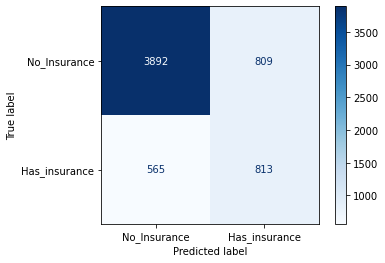

In [59]:
#Obtaining the Confusion Matrix of the Test Test
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ypred)
print(cm)
labels=["No_Insurance","Has_insurance"]
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [60]:
#Oversampled
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over_samp, y_over_samp = oversample.fit_resample(
    predictors,train['Has_Insurance'])
# summarize class distribution
print(Counter(y_over_samp))


Counter({0: 10998, 1: 10998})


In [61]:
target_over = to_categorical(y_over_samp)
predictors_over = X_over_samp.to_numpy()
n_col = predictors_over.shape[1]
n_col

103

In [62]:

test_y = test["Has_Insurance"]
train_y = target_over
test_y = to_categorical(test_y)

In [63]:
#Fitting the Model to the Oversampled Training Data
from keras.layers import Dropout
model2 = Sequential()
model2.add(Dense(30,activation= "relu",input_shape = (n_col,)))
model2.add(Dropout(0.2))

model2.add(Dense(6,activation= "relu"))
model2.add(Dropout(0.2))


model2.add(Dense(2,activation = "sigmoid"))
model2.compile(optimizer = 'adam',loss = "binary_crossentropy",
               metrics= ["accuracy",'mse'])

model2.fit(predictors_over,target_over,epochs=50,batch_size=10,
           validation_split=0.2)
model2.save("Ann-over.hs")

Epoch 1/50
1760/1760 [==============================] - 6s 3ms/step - loss: 0.5783 - accuracy: 0.6929 - mse: 0.1984 - val_loss: 0.7503 - val_accuracy: 0.5750 - val_mse: 0.2689
Epoch 2/50
1760/1760 [==============================] - 4s 2ms/step - loss: 0.5226 - accuracy: 0.7402 - mse: 0.1749 - val_loss: 0.7222 - val_accuracy: 0.5516 - val_mse: 0.2591
Epoch 3/50
1760/1760 [==============================] - 5s 3ms/step - loss: 0.5061 - accuracy: 0.7519 - mse: 0.1685 - val_loss: 0.6094 - val_accuracy: 0.6757 - val_mse: 0.2103
Epoch 4/50
1760/1760 [==============================] - 4s 2ms/step - loss: 0.4983 - accuracy: 0.7559 - mse: 0.1654 - val_loss: 0.7186 - val_accuracy: 0.6136 - val_mse: 0.2524
Epoch 5/50
1760/1760 [==============================] - 4s 2ms/step - loss: 0.4881 - accuracy: 0.7614 - mse: 0.1618 - val_loss: 0.6831 - val_accuracy: 0.6341 - val_mse: 0.2391
Epoch 6/50
1760/1760 [==============================] - 6s 3ms/step - loss: 0.4815 - accuracy: 0.7639 - mse: 0.1594 - va

In [64]:
#Checking Accuracy of Training and Test Set
pred_train= model2.predict(predictors_over)
scores = model2.evaluate(predictors_over, target_over, verbose=0)
print('Accuracy on training data: {} \n Error on training data: {}'.format(
    scores[1], 1 - scores[1]))   
 
pred_test= model2.predict(predictors1_test)
scores2 = model2.evaluate(predictors1_test, test_y, verbose=0)
print('Accuracy on test data: {} \n Error on test data: {}'.format(
    scores2[1], 1 - scores2[1]))    

688/688 [==============================] - 1s 1ms/step
Accuracy on training data: 0.8089197874069214 
 Error on training data: 0.1910802125930786
190/190 [==============================] - 0s 1ms/step
Accuracy on test data: 0.790755033493042 
 Error on test data: 0.209244966506958


In [65]:
#Obtaining the Classification Metrics of the Test Set
from sklearn.metrics import classification_report, confusion_matrix

target_names = ['No', 'Yes']

# get predict prob and label 
ypred = model2.predict(predictors1_test, verbose=1)
ypred = np.argmax(ypred, axis=1)

print(classification_report(np.argmax(test_y, axis=1), ypred,
                            target_names=target_names))

190/190 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

          No       0.87      0.86      0.86      4701
         Yes       0.54      0.56      0.55      1378

    accuracy                           0.79      6079
   macro avg       0.70      0.71      0.71      6079
weighted avg       0.79      0.79      0.79      6079



[[4037  664]
 [ 608  770]]


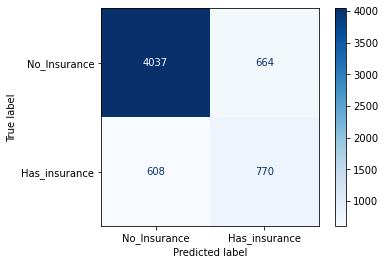

In [66]:
#Obtaining the Confusion Matrix of the Test Test
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ypred)
print(cm)
labels=["No_Insurance","Has_insurance"]
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [67]:
predictors

,Age,Monthly_Income,County_1,County_2,County_3,County_4,County_5,County_6,County_7,County_8,...,Phone_Ownership_99,Financial_Priority_1,Financial_Priority_2,Financial_Priority_3,Financial_Priority_4,Financial_Priority_5,Financial_Priority_6,Financial_Priority_11,Financial_Priority_12,Financial_Priority_99
18285,0.072165,0.009757,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3337,0.123711,0.012258,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
14655,0.144330,0.032263,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12126,0.453608,0.012258,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1148,0.154639,0.011008,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4650,0.134021,0.032263,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12916,0.154639,0.087276,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
12977,0.164948,0.024761,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7036,0.175258,0.099779,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [73]:
#Data Balancing Using SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTENC(categorical_features=cat_indices,sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(predictors, train['Has_Insurance'])



/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [74]:
y

0        0
1        0
2        0
3        0
4        0
        ..
13192    1
13193    1
13194    1
13195    1
13196    1
Name: Has_Insurance, Length: 13197, dtype: category
Categories (2, int64): [0 < 1]

In [76]:
predictors_smote = X.to_numpy()
target_smote = to_categorical(y)
n_col = predictors_smote.shape[1]
n_col

103

In [77]:
#Fitting the Model to SMOTE Balanced Training Data

from keras.layers import Dropout
model3 = Sequential()
model3.add(Dense(30,activation= "relu",input_shape = (n_col,)))
model3.add(Dropout(0.2))

model3.add(Dense(6,activation= "relu"))
model3.add(Dropout(0.2))


model3.add(Dense(2,activation = "sigmoid"))
model3.compile(optimizer = 'adam',loss = "binary_crossentropy",
               metrics= ["accuracy",'mse'])

model3.fit(predictors_smote,target_smote,epochs=50,batch_size=10,
           validation_split=0.2)
model3.save("Ann-smote.hs")

Epoch 1/50
1056/1056 [==============================] - 4s 3ms/step - loss: 0.4359 - accuracy: 0.8329 - mse: 0.1374 - val_loss: 1.3969 - val_accuracy: 0.0000e+00 - val_mse: 0.5293
Epoch 2/50
1056/1056 [==============================] - 2s 2ms/step - loss: 0.3790 - accuracy: 0.8387 - mse: 0.1171 - val_loss: 1.3536 - val_accuracy: 0.1644 - val_mse: 0.5020
Epoch 3/50
1056/1056 [==============================] - 3s 3ms/step - loss: 0.3645 - accuracy: 0.8505 - mse: 0.1120 - val_loss: 1.3055 - val_accuracy: 0.2424 - val_mse: 0.4764
Epoch 4/50
1056/1056 [==============================] - 3s 3ms/step - loss: 0.3590 - accuracy: 0.8515 - mse: 0.1099 - val_loss: 1.3850 - val_accuracy: 0.2182 - val_mse: 0.5003
Epoch 5/50
1056/1056 [==============================] - 3s 2ms/step - loss: 0.3507 - accuracy: 0.8550 - mse: 0.1072 - val_loss: 1.3402 - val_accuracy: 0.2458 - val_mse: 0.4834
Epoch 6/50
1056/1056 [==============================] - 3s 2ms/step - loss: 0.3486 - accuracy: 0.8575 - mse: 0.1066 

In [78]:
#Checking Accuracy of Training and Test Set
pred_train= model3.predict(predictors_smote)
scores = model3.evaluate(predictors_smote, target_smote, verbose=0)
print('Accuracy on training data: {} \n Error on training data: {}'.format(
    scores[1], 1 - scores[1]))   
 
pred_test= model3.predict(predictors1_test)
scores2 = model3.evaluate(predictors1_test, test_y, verbose=0)
print('Accuracy on test data: {} \n Error on test data: {}'.format(
    scores2[1], 1 - scores2[1]))    

413/413 [==============================] - 1s 1ms/step
Accuracy on training data: 0.7972266674041748 
 Error on training data: 0.2027733325958252
190/190 [==============================] - 0s 1ms/step
Accuracy on test data: 0.8100016713142395 
 Error on test data: 0.1899983286857605


In [79]:
#Classification Metrics of the Test Set
from sklearn.metrics import classification_report, confusion_matrix

target_names = ['No', 'Yes']

# get predict prob and label 
ypred = model3.predict(predictors1_test, verbose=1)
ypred = np.argmax(ypred, axis=1)

print(classification_report(np.argmax(test_y, axis=1), ypred,
                            target_names=target_names))

190/190 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

          No       0.83      0.95      0.89      4701
         Yes       0.67      0.33      0.44      1378

    accuracy                           0.81      6079
   macro avg       0.75      0.64      0.66      6079
weighted avg       0.79      0.81      0.78      6079



[[4475  226]
 [ 929  449]]


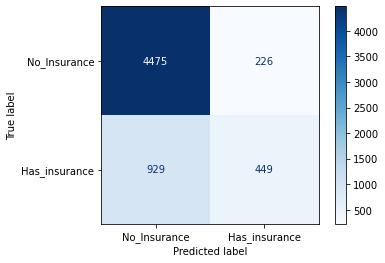

In [80]:
#Obtaining the Confusion Matrix of the Test Set
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ypred)
print(cm)
labels=["No_Insurance","Has_insurance"]
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()